# Position Salaries fitting example using linear and polynomial regression.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## importing the data

In [4]:
data = pd.read_csv(r"C:\Users\mypc\Desktop\machine learning projects\data\Positions_Salaries.csv")

In [5]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Level indicates the years oof experience of a candidate 

### offcoure its a dummy data

In [10]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## preprocessing the data in X and y axis

In [11]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

In [12]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [13]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

## Perfroming Linear regression

In [71]:
regr = LinearRegression()
regr.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Performing Polynomial regression with degree 3

In [14]:
poly_regr = PolynomialFeatures(degree = 3)
x_poly = poly_regr.fit_transform(X)

In [15]:
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [117]:
poly_regr.fit(x_poly,y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [118]:
polyregr2 = regr.fit(x_poly,y)
polyregr2


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

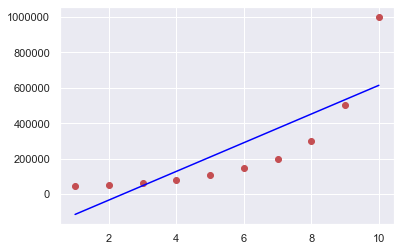

In [72]:
plt.scatter(X,y,color = "R")
plt.plot(X, regr.predict(X), color = "blue")
plt.show()


In [83]:
regr.score(X,y)

0.6690412331929895

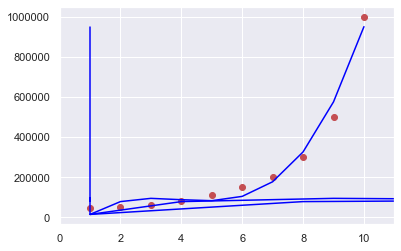

In [119]:
plt.scatter(X,y,color = "R")
plt.plot(x_poly, polyregr2.predict(poly_regr.fit_transform(X)), color = "blue")
plt.xlim(0,11)
plt.show()


In [120]:
polyregr2.score(x_poly, polyregr2.predict(poly_regr.fit_transform(X)))

1.0

## As we can easily determine from above graph that the polynimial regression provide more realistic model to predict salaries based on the years of experiece and the score is also better compared to linear regression.
